## Experiment0: Outputted LLM Complexities

Generated 10,000 equations and evaluated the LLM-outputted complexities of these equations.
* max num features = 5
* binary ops = +, -, *, /
* unary ops = sin, sqrt, exp, log

Example complexities given to the LLM: "x1 + x2 + C has complexity 3, C * sin(x1) has complexity 4, sin(exp(sin(x1))) has complexity 10"

In [14]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results_path = "../experimental_results/experiment0"

In [15]:
results = {}

In [16]:
with open(f"{results_path}/standard_complexity_10000.json", "r") as f:
    raw = json.load(f)
    results["standard"] = raw["complexities"]

with open(f"{results_path}/Qwen2.5-0.5B-Instruct-Q4_K_M_10000.json", "r") as f:
    raw = json.load(f)
    results["qwen05b"] = raw["complexities"]

with open(f"{results_path}/Qwen2.5-7B-Instruct-1M-Q6_K_10000.json", "r") as f:
    raw = json.load(f)
    results["qwen7b"] = raw["complexities"]

with open(f"{results_path}/equations_10000.json", "r") as f:
    raw = json.load(f)
    results["equations"] = raw["equations"]

In [17]:
df = pd.DataFrame(results)

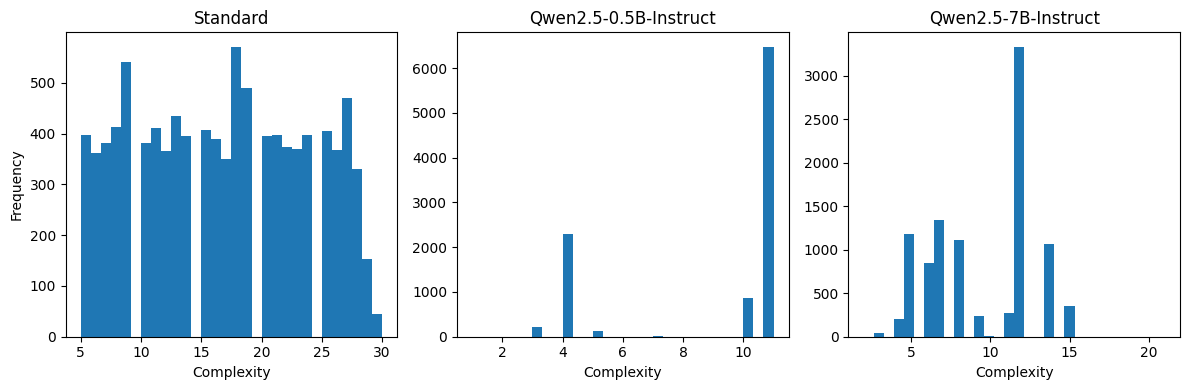

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
bins = 30

axes[0].hist(df["standard"], bins = bins)
axes[1].hist(df["qwen05b"], bins = bins)
axes[2].hist(df["qwen7b"], bins = bins)

axes[0].set_ylabel("Frequency")
axes[0].set_title("Standard")
axes[1].set_title("Qwen2.5-0.5B-Instruct")
axes[2].set_title("Qwen2.5-7B-Instruct")

for i in range(3):
    axes[i].set_xlabel("Complexity")

plt.tight_layout()
plt.show()

In [19]:
df["diff_standard_qwen05b"] = df["standard"]-df["qwen05b"]
df["diff_standard_qwen7b"] = df["standard"]-df["qwen7b"]
df["diff_qwen05b_qwen7b"] = df["qwen05b"]-df["qwen7b"]

In [20]:
def get_max_diff_expressions(compare = "diff_qwen05b_qwen7b"):
    max_pos = max(df[compare])
    min_neg = min(df[compare])
    
    parts = compare.split('_')
    method1 = parts[1] if len(parts) > 1 else "method1"
    method2 = parts[2] if len(parts) > 2 else "method2"
    
    idxs_pos = [i for i, x in enumerate(df[compare]) if x == max_pos]
    idxs_neg = [i for i, x in enumerate(df[compare]) if x == min_neg]
    
    print(f"Biggest positive difference is {max_pos}.")
    for idx in idxs_pos:
        print(f"Equation {idx}:")
        print(df["equations"][idx])
        print(f"{method1}: {df[method1][idx]}, {method2}: {df[method2][idx]}")
        print(" ")
    
    print(f"Biggest negative difference is {min_neg}.")
    for idx in idxs_neg:
        print(f"Equation {idx}:")
        print(df["equations"][idx])
        print(f"{method1}: {df[method1][idx]}, {method2}: {df[method2][idx]}")
        print(" ")

def get_agreement_expressions(compare = "diff_qwen05b_qwen7b", num_examples=5):
    parts = compare.split('_')
    method1 = parts[1] if len(parts) > 1 else "method1"
    method2 = parts[2] if len(parts) > 2 else "method2"
    
    idxs_agree = [i for i, x in enumerate(df[compare]) if x == 0]
    
    print(f"Found {len(idxs_agree)} equations where {method1} and {method2} agree.")
    print(f"Showing {min(num_examples, len(idxs_agree))} examples:")
    print(" ")
    
    for idx in idxs_agree[:num_examples]:
        print(f"Equation {idx}:")
        print(df["equations"][idx])
        print(f"Complexity: {df[method1][idx]}")
        print(" ")

In [21]:
get_max_diff_expressions("diff_standard_qwen05b")

Biggest positive difference is 24.
Equation 5460:
log(x1 + x1) - ((sin(x1 / x2) + (exp(x2) - 0.43094642856021814)) * (log(sqrt((x2 + 0.9982425741558437) / 0.6858284938905905) - 0.45421642885631186) / (x1 + x2)))
standard: 28, qwen05b: 4
 
Biggest negative difference is -6.
Equation 381:
exp(exp(-0.4293961376934732 * x1))
standard: 5, qwen05b: 11
 
Equation 1168:
exp(sin(-0.971792067295965 + x1))
standard: 5, qwen05b: 11
 
Equation 1460:
exp(exp(-1.1027604037234344 - x2))
standard: 5, qwen05b: 11
 
Equation 1513:
exp(sin(x2 + -0.2858658513278749))
standard: 5, qwen05b: 11
 
Equation 1744:
exp(sin(x1 * x1))
standard: 5, qwen05b: 11
 
Equation 2239:
exp(sin(x1 / -0.6266454495842172))
standard: 5, qwen05b: 11
 
Equation 2268:
exp(-1.082934755276427 - log(x4))
standard: 5, qwen05b: 11
 
Equation 2616:
exp(sin(x4 + -0.6553826079959602))
standard: 5, qwen05b: 11
 
Equation 3543:
exp(-1.3932516698341704 + log(x2))
standard: 5, qwen05b: 11
 
Equation 3545:
exp(sin(0.6354122430795637 - x1))
stan

In [22]:
get_max_diff_expressions("diff_standard_qwen05b")

Biggest positive difference is 24.
Equation 5460:
log(x1 + x1) - ((sin(x1 / x2) + (exp(x2) - 0.43094642856021814)) * (log(sqrt((x2 + 0.9982425741558437) / 0.6858284938905905) - 0.45421642885631186) / (x1 + x2)))
standard: 28, qwen05b: 4
 
Biggest negative difference is -6.
Equation 381:
exp(exp(-0.4293961376934732 * x1))
standard: 5, qwen05b: 11
 
Equation 1168:
exp(sin(-0.971792067295965 + x1))
standard: 5, qwen05b: 11
 
Equation 1460:
exp(exp(-1.1027604037234344 - x2))
standard: 5, qwen05b: 11
 
Equation 1513:
exp(sin(x2 + -0.2858658513278749))
standard: 5, qwen05b: 11
 
Equation 1744:
exp(sin(x1 * x1))
standard: 5, qwen05b: 11
 
Equation 2239:
exp(sin(x1 / -0.6266454495842172))
standard: 5, qwen05b: 11
 
Equation 2268:
exp(-1.082934755276427 - log(x4))
standard: 5, qwen05b: 11
 
Equation 2616:
exp(sin(x4 + -0.6553826079959602))
standard: 5, qwen05b: 11
 
Equation 3543:
exp(-1.3932516698341704 + log(x2))
standard: 5, qwen05b: 11
 
Equation 3545:
exp(sin(0.6354122430795637 - x1))
stan

In [23]:
get_max_diff_expressions("diff_qwen05b_qwen7b")

Biggest positive difference is 6.
Equation 45:
exp(-1.398953610652112 + (-1.269506057896663 + x2))
qwen05b: 11, qwen7b: 5
 
Equation 414:
x3 / exp(x3 + x3)
qwen05b: 11, qwen7b: 5
 
Equation 559:
exp(log((0.755356336084365 * x1) / 0.002512465696993316) + ((x1 - 0.6960431615566466) - x1))
qwen05b: 11, qwen7b: 5
 
Equation 739:
exp((0.394059509996861 + x1) / 1.8629311418725614)
qwen05b: 11, qwen7b: 5
 
Equation 1302:
exp(log(x2 - (x2 / 1.0736054480125727))) + x2
qwen05b: 11, qwen7b: 5
 
Equation 1475:
exp(-0.6670697822502784 * (-0.18558565541542069 - x1))
qwen05b: 11, qwen7b: 5
 
Equation 1937:
((-1.465129437606167 + (0.12135355323587446 / x1)) + x2) * 0.22743212721648778
qwen05b: 11, qwen7b: 5
 
Equation 2112:
1.1994660307242813 + ((2.4744863395301278 / (0.946110349092263 / x1)) - -1.4286079739388804)
qwen05b: 11, qwen7b: 5
 
Equation 2268:
exp(-1.082934755276427 - log(x4))
qwen05b: 11, qwen7b: 5
 
Equation 2545:
sin(((-0.5956293137572605 + sqrt(x1)) - (-0.9895546784077058 - x1)) - 0.833

In [24]:
get_agreement_expressions("diff_standard_qwen05b")

Found 183 equations where standard and qwen05b agree.
Showing 5 examples:
 
Equation 47:
(1.5978390854675573 - x1) * (((1.339517371736295 + x1) * -0.7553730031161378) + x1)
Complexity: 11
 
Equation 250:
-0.9778996068463256 - (x1 + ((x1 / x1) * (x1 + -0.05647178875384948)))
Complexity: 11
 
Equation 311:
sqrt(exp(-0.44198313237203346 / (1.1647037657044315 + (0.32589139758430696 * x1))) - -0.3372479860598701)
Complexity: 11
 
Equation 322:
exp(x3 / ((sqrt(x1) + (1.5692673404711586 * x3)) + x4))
Complexity: 11
 
Equation 325:
log((((0.3336621102690361 - x1) * 0.5410710579237122) / sqrt(x1)) + x1)
Complexity: 11
 


In [25]:
get_agreement_expressions("diff_standard_qwen7b")

Found 271 equations where standard and qwen7b agree.
Showing 5 examples:
 
Equation 6:
0.5309852116327934 + log(exp(x4))
Complexity: 5
 
Equation 10:
x1 * (x1 - -0.18651976727623348)
Complexity: 5
 
Equation 14:
sin(sin((-1.9702923746461398 * x1) - 0.9377329705490449))
Complexity: 7
 
Equation 44:
sqrt(exp(x1)) - x2
Complexity: 5
 
Equation 50:
x1 * (x2 + x1)
Complexity: 5
 


In [26]:
get_agreement_expressions("diff_qwen05b_qwen7b")

Found 433 equations where qwen05b and qwen7b agree.
Showing 5 examples:
 
Equation 42:
((x5 + (x4 + x3)) + ((sqrt(x3) / 0.3344663325523246) * (0.8728833888559692 + (sin(0.451525306499708 - x1) + (0.9525386951004919 + x2))))) - x5
Complexity: 11
 
Equation 59:
((0.8255338356574697 + (-0.6001668663812477 * (exp(x1) / (exp(x1 - (-0.4839221415177399 * x3)) / (x4 * log(x2)))))) * 2.7791474092975226) / -1.6569493251343863
Complexity: 11
 
Equation 70:
1.894305100265272 + (x2 * x1)
Complexity: 4
 
Equation 77:
-0.78430859198678 + (0.3071489370403848 - x2)
Complexity: 4
 
Equation 86:
(x1 + x3) * ((sqrt(x3) * (x1 * x3)) - sqrt(exp(x1)))
Complexity: 11
 
